# HW02: Practice with logistic regression and decision tree

Leo Xiong tlxiong

## Hello Students:

- Start by downloading HW02.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- If you have questions, please ask them in class or office hours. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in HW02.ipynb and HW02.html to Canvas's HW02 assignment (use 'Add A File')

  As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import svm, linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# 1. Logistic regression

# 1a. Make a logistic regression model
relating the probability an iris has Species='virginica' to its 'Petal.Length'
and classifying irises as 'virginica' or not 'virginica' (i.e. 'versicolor').
- Read [http://www.stat.wisc.edu/~jgillett/451/data/iris.csv](http://www.stat.wisc.edu/~jgillett/451/data/iris.csv) into a DataFrame.
- Make a second data frame that excludes the 'setosa' rows (leaving the 'virginica' and 'versicolor' rows) and includes only the Petal.Length and Species columns.
- Use `linear_model.LogisticRegression(C=1000)` so we all get the same results (they vary with `C`).
- Train the model using $X=$ petal length and $y=$ whether the Species is 'virginica'.
  (I used "y = (df['Species'] == 'virginica').to_numpy().astype(int)",
  which sets y to zeros and ones.)
- Report its accuracy on the training data.
- Report the estimated P(Species=virginica | Petal.Length=5).
- Report the predicited Species ('virginica' or 'versicolor') for Petal.Length=5.
- Make a plot showing:
  - the data points
  - the estimated logistic curve
  - and what I have called the "sample proportion" of y == 1 at each unique Petal.Length value
  - a legend and title and other labels necessary to make the plot easy to read

Accuracy: 0.93
Probability of virginica: 0.7723252046633117
Predicted Species for Petal Length of 5 is: virginica


C:\Users\leoxi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\leoxi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\leoxi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


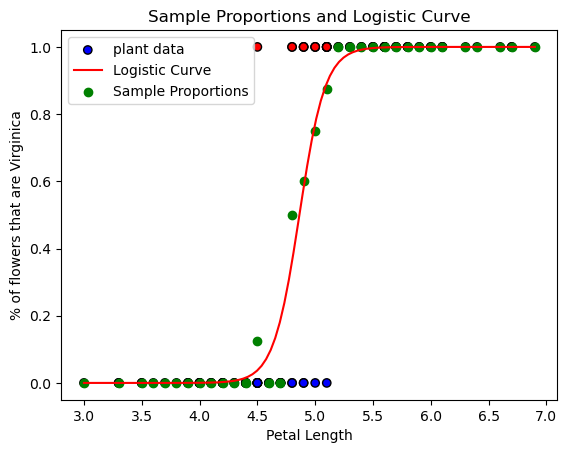

In [6]:
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/iris.csv')
df2 = df[df['Species'] != 'setosa']
df2 = df2[['Petal.Length','Species']]

model = linear_model.LogisticRegression(C=1000)
X = df2[['Petal.Length']]
y = (df2["Species"] == 'virginica').to_numpy().astype(int)

model.fit(X, y)
accuracy = model.score(X, y)
print(f'Accuracy: {accuracy}')

petal_length = 5
virginica5prob = model.predict_proba([[petal_length]])[0][1]
print(f'Probability of virginica: {virginica5prob}')

predicted_species = model.predict([[petal_length]])[0]  
species = 'virginica' if predicted_species == 1 else 'versicolor'  
print(f'Predicted Species for Petal Length of {petal_length} is: {species}')  



plt.scatter(X, y, c=y, cmap='bwr', edgecolors='k', label = "plant data")

x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_probs = model.predict_proba(x_vals)[:, 1]
plt.plot(x_vals, y_probs, color='red', label='Logistic Curve')

prop_data = df2.copy()
prop_data['y'] = y
sample_proportions = prop_data.groupby('Petal.Length')['y'].mean()
plt.scatter(sample_proportions.index, sample_proportions.values, color='green', label='Sample Proportions')

plt.xlabel('Petal Length')
plt.ylabel('% of flowers that are Virginica')
plt.title('Sample Proportions and Logistic Curve')
plt.legend()
plt.show()

## 1b. Do some work with logistic regression by hand.
Consider the logistic regression model, $P(y
_i = 1) = \frac{1}{1 + e^{-(\mathbf{w x} + b)}}\,.$

Logistic regression is named after the log-odds of success, $\ln
  \frac{p}{1 - p}$, where $p = P(y_i = 1)$. Show that this log-odds
  equals $\mathbf{w x} + b$. (That is, start with $\ln
  \frac{p}{1 - p}$ and connect it in a series of equalities to $\mathbf{w x} + b$.)
  

#### ... your Latex math in a Markdown cell here ...

$\begin{align*} % In this Latex context, "&" separates columns and "\\" ends a line.
   \ln  \frac{p}{1 - p} & = \ln \left( \frac{\frac{1}{1 + e^{-(wx + b)}}}{1 - \frac{1}{1 + e^{-(wx + b)}}} \right) \\  
    &= \ln \left( \frac{\frac{1}{1 + e^{-(wx + b)}}}{\frac{e^{-(wx + b)}}{1 + e^{-(wx + b)}}} \right) \\  
    &= \ln \left( \frac{1}{e^{-(wx + b)}} \right) \\  
    &= \ln \left( e^{wx + b} \right) \\  
    &= wx + b  
 \end{align*}
$

### 1c. Do some more work with logistic regression by hand.

I ran some Python/scikit-learn code to make the model pictured here: ![](https://pages.stat.wisc.edu/~jgillett/451/02/toyLogistic.png)

From the image and without the help of running code, match each code line from the top list with its output from the bottom list.

1. `model.intercept_`
2. `model.coef_`
3. `model.predict(X)`
4. `model.predict_proba(X)[:, 1]`

A. `array([0, 0, 0, 1])`,
B. `array([0.003, 0.5, 0.5, 0.997])`,
C. `array([5.832])`,
D. `array([0.])`

In [10]:
# ... Your answer here in a Markdown cell ...# For example, "1: A, 2: B, 3: C, 4: D" is wrong but has the right format.
print("1: C, 2: D, 3: A, 4: B")

1: C, 2: D, 3: A, 4: B


# 2. Decision tree

## 2a. Make a decision tree model on a Titanic data set.
Read the data from [http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv](http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv).

These data are described at [https://www.kaggle.com/competitions/titanic/data](https://www.kaggle.com/competitions/titanic/data) (click on the small down-arrow to see the "Data Dictionary"), which is where they are from.

- Retain only the Survived, Pclass, Sex, and Age columns.
- Display the  first seven rows (passengers).
  Notice that the Age column includes NaN, indicating a missing value.
- Drop rows with missing data via `df.dropna()`. Display your data frame's shape before
  and after dropping rows. (It should be (714, 4) after dropping rows.)
- Add a column called 'Female' that indicates whether a passenger is Female. You can make this column via `df.Sex == 'female'`. This gives bool values True and False, which are interpreted as 1 and 0 when used in an arithmetic context.
- Train a decision tree with `max_depth=None` to decided whether a passenger
  `Survived` from the other three columns. Report its accuracy (with 3 decimal places)
  on training data along with the tree's depth (which is available in `clf.tree_.max_depth`).
- Train another tree with `max_depth=2`. Report its accuracy (with 3 decimal places).
  Use `tree.plot_tree()` to display it, including feature_names to make the tree easy to read.

First Seven Rows:
      
   Survived  Pclass     Sex   Age
0         0       3    male  22.0
1         1       1  female  38.0
2         1       3  female  26.0
3         1       1  female  35.0
4         0       3    male  35.0
5         0       3    male   NaN
6         0       1    male  54.0
      
Accuracy (max_depth = None): 0.896
Tree Depth (max_depth = None): 15
      
      
Tree Graph:


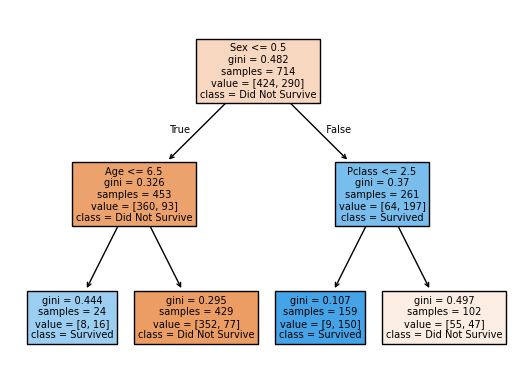

Accuracy (max_depth = 2): 0.803
Tree Depth (max_depth = 2): 2


In [37]:
# ... your code here ...
df = pd.read_csv("http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv")
df = df[["Survived", "Pclass", "Sex", "Age"]]

print("First Seven Rows:")
print("      ")
print(df.head(7))
print("      ")
      
df = df.dropna()
df['Female'] = df.Sex == 'female'
df['Sex'] = df.Sex.map({'male': 0, 'female': 1})

X = df[["Pclass", "Sex", "Age"]]
y = df["Survived"]

clf = DecisionTreeClassifier(max_depth=None)
clf.fit(X, y)
y_pred = clf.predict(X)
accuracy = accuracy_score(y, y_pred)
depth = clf.tree_.max_depth

print(f"Accuracy (max_depth = None): {accuracy:.3f}")
print(f"Tree Depth (max_depth = None): {depth}")
print("      ")



clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X,y)
y_pred = clf.predict(X)
accuracy = accuracy_score(y, y_pred)
depth = clf.tree_.max_depth

print("      ")
print("Tree Graph:")

tree.plot_tree(clf, feature_names=["Pclass", "Sex", "Age"], class_names=["Did Not Survive", "Survived"], filled=True)
plt.show()

print(f"Accuracy (max_depth = 2): {accuracy:.3f}")
print(f"Tree Depth (max_depth = 2): {depth}")

## 2b. Which features are used in the (max_depth=2) decision-making? Answer in a markdown cell.

The feature "Sex" and "Pclass" are used on this decision making. If gender was 1 (female) they survived, if the gender was 0 (Male), they did not survive. For Pclass, if the female was in 1st or 2nd class, they were more likely to survive than a female in 3rd class.

 ## 2c. What proportion (in the cleaned-up data) of females survived? What proportion of males survived?
 Answer in two sentences via print(), with each proportion rounded to three decimal places.
 
 Hint: There are many ways to do this. One quick way is to find the average of the `Survived`
 column for each subset.

In [16]:
# ... your code here ...
females = df[df['Sex'] == 1]['Survived'].mean()
males = df[df['Sex'] == 0]['Survived'].mean()

print(f"Proportion of females who survived: {females:.3f}")
print(f"Proportion of males who survived: {males:.3f}")

Proportion of females who survived: 0.755
Proportion of males who survived: 0.205


## 2d. Do some decision tree calculations by hand.
Consider a decision tree node containing the following set of examples $S =
\{(\mathbf{x}, y)\}$ where $\mathbf{x} = (x_1, x_2)$:

((4, 9), 1)

((2, 6), 0)

((5, 7), 0)

((3, 8), 1)

Find the entropy of $S$.

# ... your brief work and answer here in a markdown cell ...
S = {((4, 9), 1)

    ((2, 6), 0)

    ((5, 7), 0)

    ((3, 8), 1)}

Occurences<br>
Class1 Count: 2 <br>
Class0 Count: 2 <br>
<br>
Probability: <br>
P(class = 0) = 2/4 = 0.5 <br>
P(class = 1) = 2/4 = 0.5 <br>
<br>
entropy formula = -(pi*log2(pi)+pi*log2(pi))<br>
entropy(S) = -(0.5*log2(0.5)+0.5*log2(0.5))<br>
entropy(S) = -(0.5*-1 + 0.5*-1)<br>
entropy(S) = -(-1)<br>
<b>entropy(S) = 1 

 ## 2e. Do some more decision tree calculations by hand.
Find a (feature, threshold) pair that yields the best split for this node.

# Look at the first items of tuples, and check if the second one is bigger than 7 (x2 > 7)

x2 > 7 = ((3, 8), 1), ((4, 9), 1)<br>
x2 <= 7 = ((2, 6), 0), ((5, 7), 0) <br>
<br>
x2 > 7 probability: <br>
p(class1) = 2/2 = 1 <br>
p(class0) = 0/2 = 0 <br>
entropy(x2 > 7) = -(1*log2(1)+0*log2(0))<br>
entropy(x2 > 7) = 0
<br>
<br>
x2 <= 7 probability: <br>
p(class1) = 0/2 = 0 <br>
p(class0) = 2/2 = 1 <br>
entropy(x2 <= 7) = -(0*log2(0)+1*log2(1))<br>
entropy(x2 <= 7) = 0
<br>
<br>
2/4 * 0 + 2/4 * 0 = 0 <br>
<b>1-0 = 1 <br>
<br>
"The feature 'x2 > 7' yields the best split for the dataset, resulting in an Information Gain of 1"
